# Answer1
The mathematical formula for a linear Support Vector Machine (SVM) can be represented as follows:

Given a set of training data points \(x_i\) with corresponding labels \(y_i\) where \(i = 1, 2, ..., n\) and \(y_i \in \{-1, 1\}\), a linear SVM seeks to find a hyperplane in the feature space that separates the data into two classes. The hyperplane is defined by the equation:

[ f(x) = {w} *{x} + b ]

Here:
- \( {w} \) is the weight vector.
- \( {x} \) is the input feature vector.
- \( b \) is the bias term.

The decision rule is based on the sign of \( f(x) \):
- If \( f(x) \geq 0 \), the data point is classified as belonging to class \(1\).
- If \( f(x) < 0 \), the data point is classified as belonging to class \(-1\).

The goal of training a linear SVM is to find the parameters \( \mathbf{w} \) and \( b \) that maximize the margin, which is the distance between the hyperplane and the nearest data point from either class. This optimization problem is typically solved using techniques such as quadratic programming.

The optimization problem can be formulated as:

\[
\begin{align*}
\text{Minimize} \quad & \frac{1}{2} \| \mathbf{w} \|^2 \\
\text{Subject to} \quad & y_i(\mathbf{w} \cdot \mathbf{x}_i + b) \geq 1 \quad \text{for all } i
\end{align*}
\]

This formulation incorporates the margin constraint, ensuring that data points are correctly classified with a margin of at least 1. The SVM aims to find the hyperplane that separates the classes while maximizing the margin.

# Answer2
The objective function of a linear Support Vector Machine (SVM) is to maximize the margin between the two classes while minimizing the classification error. The optimization problem is typically formulated as follows:

\[ \min_{{w}, b} \frac{1}{2} \| \mathbf{w} \|^2 \]

subject to the constraints:

\[ y_i(\mathbf{w} \cdot \mathbf{x}_i + b) \geq 1 \]

for all training data points \((\mathbf{x}_i, y_i)\), where \(y_i \in \{-1, 1\}\).

In this formulation:
- \(\mathbf{w}\) is the weight vector.
- \(b\) is the bias term.
- \(\| \mathbf{w} \|^2\) is the squared Euclidean norm of the weight vector, representing the margin.

The objective function aims to minimize the squared Euclidean norm of the weight vector (\(\frac{1}{2} \| \mathbf{w} \|^2\)) while still satisfying the constraint that each data point is correctly classified with a margin of at least 1.

This optimization problem is typically solved using techniques from convex optimization, and the resulting solution provides the parameters \(\mathbf{w}\) and \(b\) that define the hyperplane with the maximum margin separating the two classes in the feature space.

# Answer3
The kernel trick is a technique used in Support Vector Machines (SVMs) to handle non-linearly separable data by implicitly mapping the input features into a higher-dimensional space. SVMs are originally designed for linearly separable data, where a hyperplane can be used to separate two classes. However, in real-world scenarios, the data may not be linearly separable.

The idea behind the kernel trick is to transform the input features into a higher-dimensional space, where a hyperplane can be used to separate the data in a non-linear way. This transformation is often computationally expensive, but the key insight is that you don't need to explicitly compute the transformed feature vectors. Instead, you can use a kernel function to compute the dot product between the transformed vectors directly.

The general form of the decision function in a kernelized SVM is given by:

\[ f(\mathbf{x}) = \sum_{i=1}^{n} \alpha_i y_i K(\mathbf{x}_i, \mathbf{x}) + b \]

Here:
- \( f(\mathbf{x}) \) is the decision function.
- \( \alpha_i \) are the Lagrange multipliers obtained during the training phase.
- \( y_i \) are the class labels.
- \( K(\mathbf{x}_i, \mathbf{x}) \) is the kernel function, which computes the dot product of the transformed feature vectors.

The most commonly used kernels include:
1. **Linear Kernel:** \( K(\mathbf{x}_i, \mathbf{x}) = \mathbf{x}_i \cdot \mathbf{x} \)
2. **Polynomial Kernel:** \( K(\mathbf{x}_i, \mathbf{x}) = (\mathbf{x}_i \cdot \mathbf{x} + c)^d \)
3. **Radial Basis Function (RBF) or Gaussian Kernel:** \( K(\mathbf{x}_i, \mathbf{x}) = \exp\left(-\frac{\|\mathbf{x}_i - \mathbf{x}\|^2}{2\sigma^2}\right) \)
4. **Sigmoid Kernel:** \( K(\mathbf{x}_i, \mathbf{x}) = \tanh(\alpha \mathbf{x}_i \cdot \mathbf{x} + c) \)

The advantage of using the kernel trick is that it allows SVMs to implicitly operate in high-dimensional spaces without explicitly computing the transformed feature vectors. This can be particularly useful when dealing with complex, non-linear relationships in the data.

# Answer4
Support vectors play a crucial role in Support Vector Machines (SVM), a supervised learning algorithm used for classification and regression tasks. SVM aims to find a hyperplane that best separates data points of different classes in the feature space. Support vectors are the data points that lie closest to the decision boundary (hyperplane) and influence the positioning and orientation of the hyperplane.

Here's a brief explanation of the role of support vectors in SVM:

1. **Hyperplane Definition:** SVM seeks to find a hyperplane that maximally separates the data points of different classes. The hyperplane is defined by the support vectors.

2. **Margin Maximization:** The margin is the distance between the hyperplane and the nearest data point of either class. SVM aims to maximize this margin. Support vectors are the data points that lie on the edge of the margin.

3. **Decision Boundary Influence:** The position and orientation of the hyperplane are determined by the support vectors. Changing the position of a non-support vector would not affect the decision boundary, as it would still be possible to find another hyperplane with the same margin. However, moving or removing a support vector may alter the decision boundary.

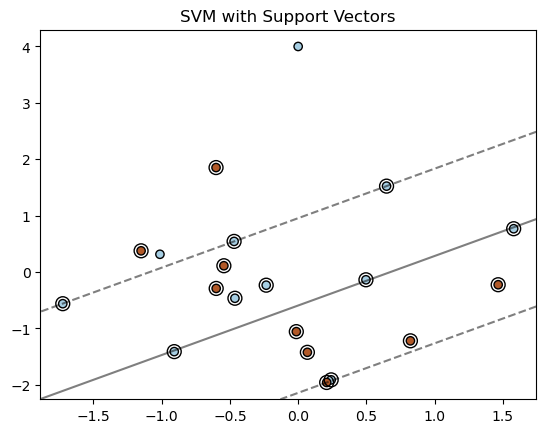

In [1]:
#example:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Generate synthetic data
np.random.seed(42)
X = np.random.randn(20, 2)
y = np.concatenate([-np.ones(10), np.ones(10)])

# Add an outlier
X[19] = [0, 4]
y[19] = -1

# Create an SVM classifier
clf = svm.SVC(kernel='linear', C=1)
clf.fit(X, y)

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, marker='o', edgecolors='k')

# Plot the decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])

# Plot decision boundary and margins
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--'])

# Highlight support vectors
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=100, facecolors='none', edgecolors='k')
plt.title('SVM with Support Vectors')
plt.show()

# Answer4
In the graphs generated by the code above, you'll see the following:

Hard Margin SVM:

The decision boundary (hyperplane) is such that it maximally separates the two classes.
There is no tolerance for misclassifications (C is set to infinity), leading to a narrow margin.
Outliers heavily influence the decision boundary.
Soft Margin SVM:

The decision boundary is influenced by support vectors and is allowed to have some misclassifications.
The parameter C is set to a finite value, allowing for a more flexible decision boundary.
Outliers have less impact on the decision boundary.
These visualizations help illustrate the concepts of hyperplane, marginal plane, soft margin, and hard margin in SVM. The decision boundary is influenced by both the support vectors and the choice of the margin (tolerance for misclassifications).

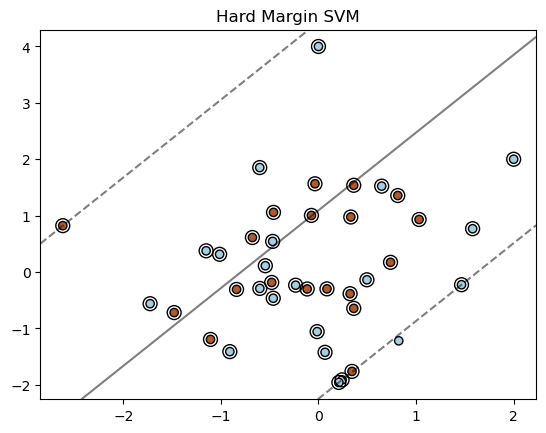

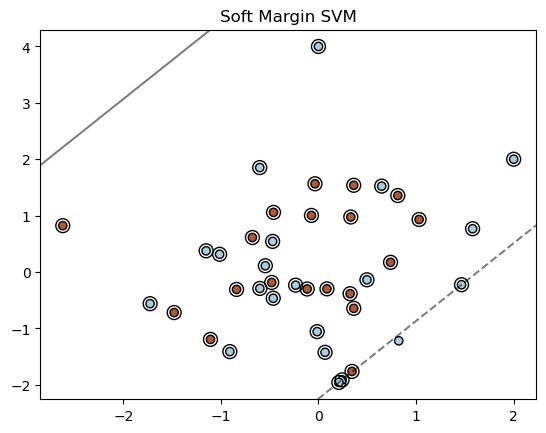

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Create a synthetic dataset
np.random.seed(42)
X = np.random.randn(40, 2)
y = np.concatenate([-np.ones(20), np.ones(20)])

# Introduce a couple of outliers
X[19] = [0, 4]
X[39] = [2, 2]
y[19] = -1
y[39] = -1

# Create SVM classifiers with different margins
# Use a large but finite value for C in hard_margin
clf_hard_margin = svm.SVC(kernel='linear', C=1e3)
clf_soft_margin = svm.SVC(kernel='linear', C=0.1)

# Fit the models
clf_hard_margin.fit(X, y)
clf_soft_margin.fit(X, y)

# Plotting
def plot_svm_decision_boundary(clf, title):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, marker='o', edgecolors='k')
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create grid to evaluate model
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])

    # Plot decision boundary and margins
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])

    # Highlight support vectors
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
                s=100, facecolors='none', edgecolors='k')
    plt.title(title)
    plt.show()

# Plot the decision boundaries for Hard Margin SVM
plot_svm_decision_boundary(clf_hard_margin, 'Hard Margin SVM')

# Plot the decision boundaries for Soft Margin SVM
plot_svm_decision_boundary(clf_soft_margin, 'Soft Margin SVM')


# Answer6

Accuracy on the testing set: 0.80


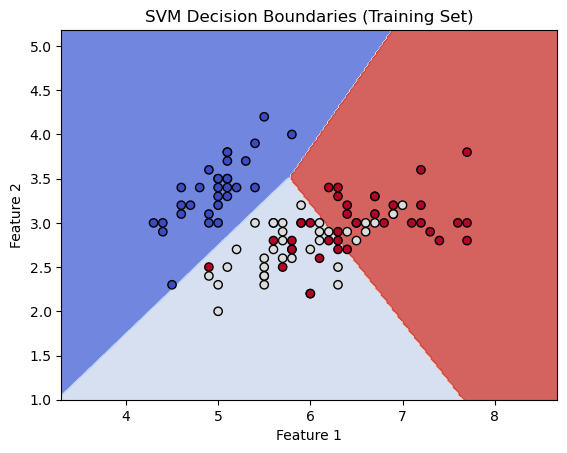

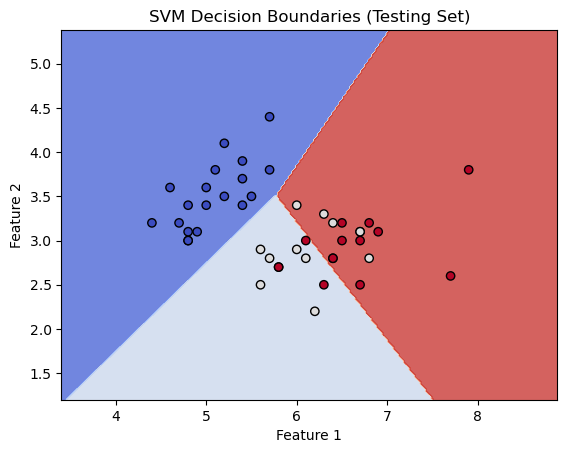

Accuracy on the testing set (C=0.1): 0.82
Accuracy on the testing set (C=1): 0.80
Accuracy on the testing set (C=10): 0.80


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Selecting only the first two features for visualization purposes
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a linear SVM classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

# Predict labels for the testing set
y_pred = svm_classifier.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the testing set: {accuracy:.2f}")

# Plot decision boundaries
def plot_decision_boundaries(X, y, classifier, title):
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k', marker='o')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Plot decision boundaries of the trained model
plot_decision_boundaries(X_train, y_train, svm_classifier, 'SVM Decision Boundaries (Training Set)')
plot_decision_boundaries(X_test, y_test, svm_classifier, 'SVM Decision Boundaries (Testing Set)')

# Try different values of the regularization parameter C
C_values = [0.1, 1, 10]
for C in C_values:
    svm_classifier_c = SVC(kernel='linear', C=C)
    svm_classifier_c.fit(X_train, y_train)
    y_pred_c = svm_classifier_c.predict(X_test)
    accuracy_c = accuracy_score(y_test, y_pred_c)
    print(f"Accuracy on the testing set (C={C}): {accuracy_c:.2f}")